In [7]:
library(devtools)
install_github("guebin/EBT",force=TRUE)
install_github("seoyeonc/gglite",force=TRUE)
library(ebt)
library(gglite)
library(tidyverse)
library(ggplot2)
library(patchwork)
figsize()

Using GitHub PAT from the git credential store.




── R CMD build ─────────────────────────────────────────────────────────────────
✔  checking for file ‘/tmp/RtmpRPpL3J/remotes18fb85ead973c/guebin-EBT-0e44b89/DESCRIPTION’
─  preparing ‘ebt’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Omitted ‘LazyData’ from DESCRIPTION
─  building ‘ebt_0.1.0.tar.gz’
   


Using GitHub PAT from the git credential store.




── R CMD build ─────────────────────────────────────────────────────────────────
✔  checking for file ‘/tmp/RtmpRPpL3J/remotes18fb878f989c7/seoyeonc-gglite-1cbaec7/DESCRIPTION’
─  preparing ‘gglite’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Omitted ‘LazyData’ from DESCRIPTION
─  building ‘gglite_0.1.0.tar.gz’
   


In [16]:
fs=1000
t=-2000:2000/fs
v1=sin(2*pi*t)
v2=cos(20*pi*t)
f=v1*v2

In [17]:
out1<-ebt(t,f,tau=60)
i1<-out1$knot[[1]]
i2<-out1$knot[[20]]
i3<-out1$knot[[40]]
out2<-ebt(t,f,tau=80)
i4<-out2$knot[[1]]
i5<-out2$knot[[20]]
i6<-out2$knot[[40]]

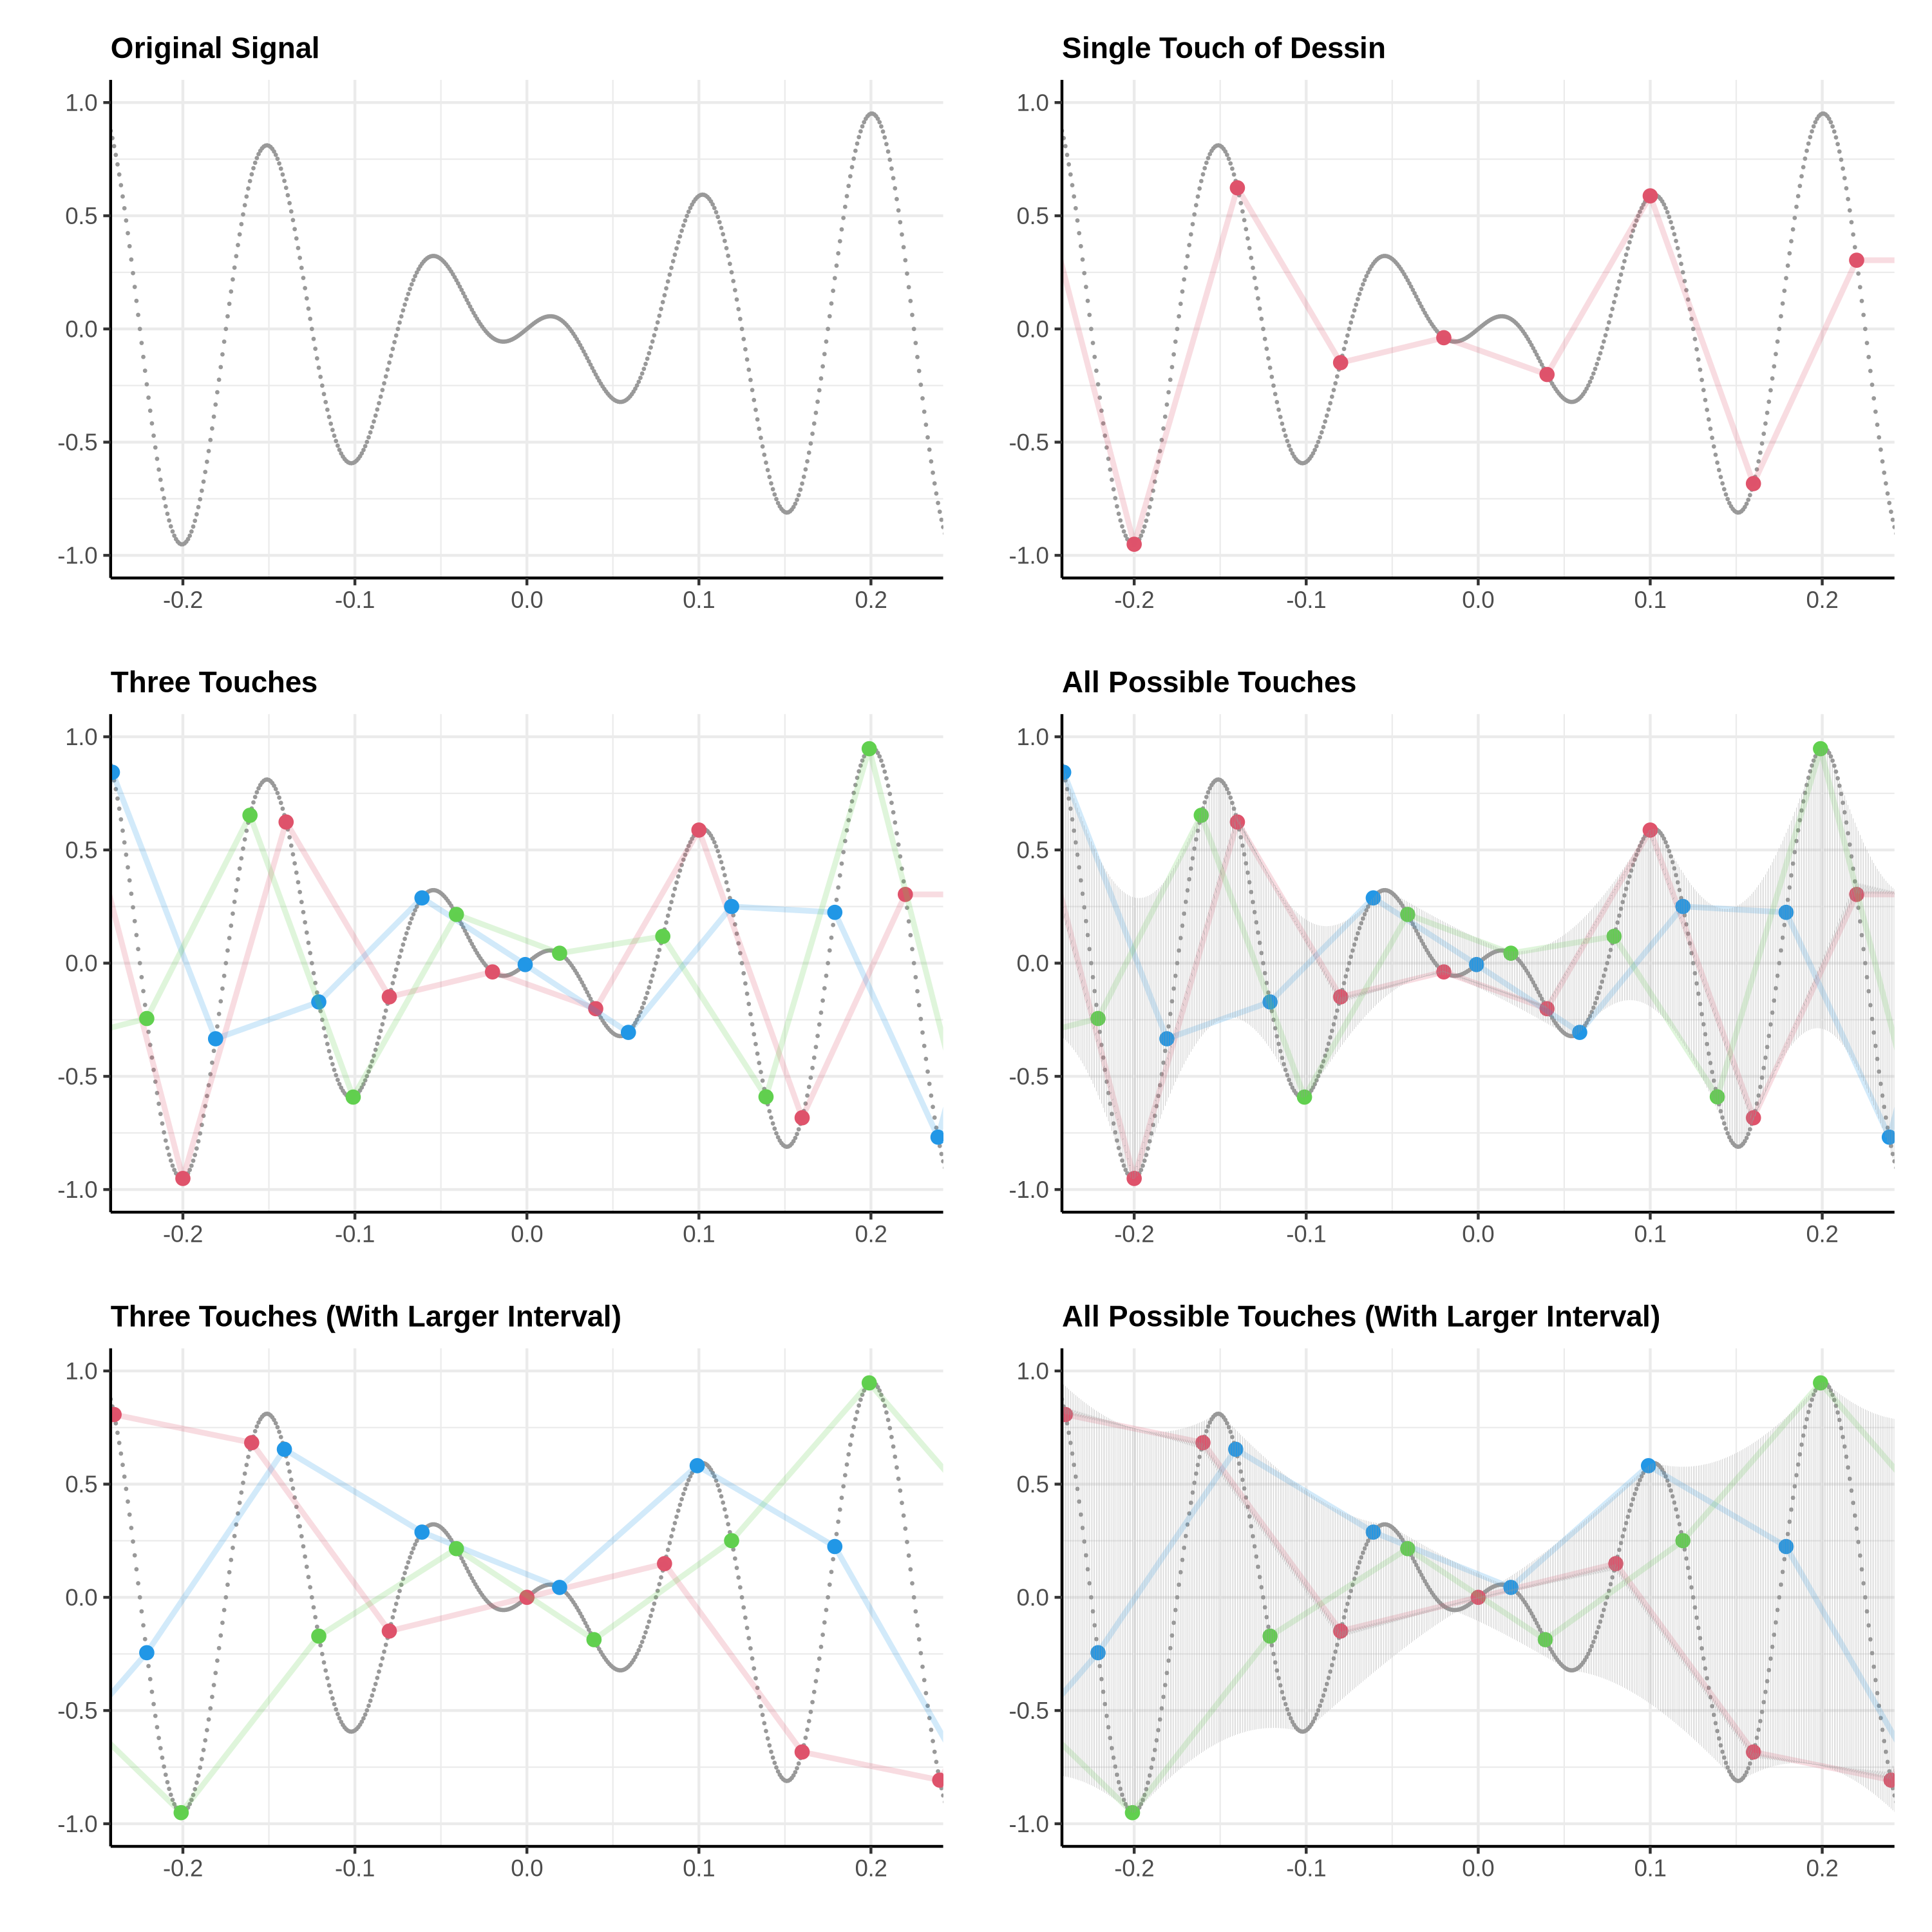

In [18]:
figsize(10,10)
fig1a = gglite() + 
  point(t,f,col="gray60",cex=0.1) + 
  ggtitle("Original Signal")+xlab("")+ylab("")+
  coord_cartesian(xlim=c(-0.22,0.22))
fig1b = fig1a + ggtitle("Single Touch of Dessin") + 
  point(t[i1],out1$band[,1][i1],cex=2,col=2) + # band1, point
  line(t[i1],out1$band[,1][i1],col=2,alpha=0.2,lwd=1) # band1, line
fig1c = fig1a + ggtitle("Three Touches") + 
  point(t[i1],out1$band[,1][i1],cex=2,col=2)+ # band1, point
  line(t[i1],out1$band[,1][i1],col=2,alpha=0.2,lwd=1)+ # band1, line 
  point(t[i2],out1$band[,20][i2],cex=2,col=4)+ # band20, point 
  line(t[i2],out1$band[,20][i2],col=4,alpha=0.2,lwd=1)+ # band20, line
  point(t[i3],out1$band[,40][i3],cex=2,col=3)+ # band40, point
  line(t[i3],out1$band[,40][i3],col=3,alpha=0.2,lwd=1) # band40, line
fig1d <- fig1c + line(t,out1$band,col="gray60",lwd=0.05) + ggtitle("All Possible Touches")
fig1e <- fig1a + point(t[i4],out2$band[,1][i4],cex=2,col=2)+ # band1, point
  line(t[i4],out2$band[,1][i4],col=2,alpha=0.2,lwd=1)+ # band1, line 
  point(t[i5],out2$band[,20][i5],cex=2,col=4)+ # band20, point 
  line(t[i5],out2$band[,20][i5],col=4,alpha=0.2,lwd=1)+ # band20, line
  point(t[i6],out2$band[,40][i6],cex=2,col=3)+ # band40, point
  line(t[i6],out2$band[,40][i6],col=3,alpha=0.2,lwd=1)+ # band40, line
  ggtitle("Three Touches (With Larger Interval)")
fig1f <- fig1e + line(t,out2$band,col="gray60",lwd=0.05) + ggtitle("All Possible Touches (With Larger Interval)")
fig1 <- (fig1a|fig1b)/(fig1c|fig1d)/(fig1e|fig1f)
fig1